In [1]:
import math
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif

In [2]:
# read data as 32 bit floats
file = os.path.join(os.pardir, "input", "jane-street-market-prediction", "train.csv")
dtype = {c: np.float32 for c in pd.read_csv(file, nrows=1).columns}
full_df = pd.read_csv(file, engine="c", dtype=dtype)

In [3]:
# split into training and validation
train_df = full_df[full_df["date"].between(86, 375)]

# fill missing values with -100.0
train_df = train_df.fillna(-100.0)

# build features and labels
features = [c for c in train_df.columns if "feature" in c]
train_X = train_df[features].to_numpy()
train_y = train_df["resp"].gt(0.0).astype(np.uint8).to_numpy()

print(f"Class imbalance: {train_y.mean()}")

Class imbalance: 0.5044864553632409


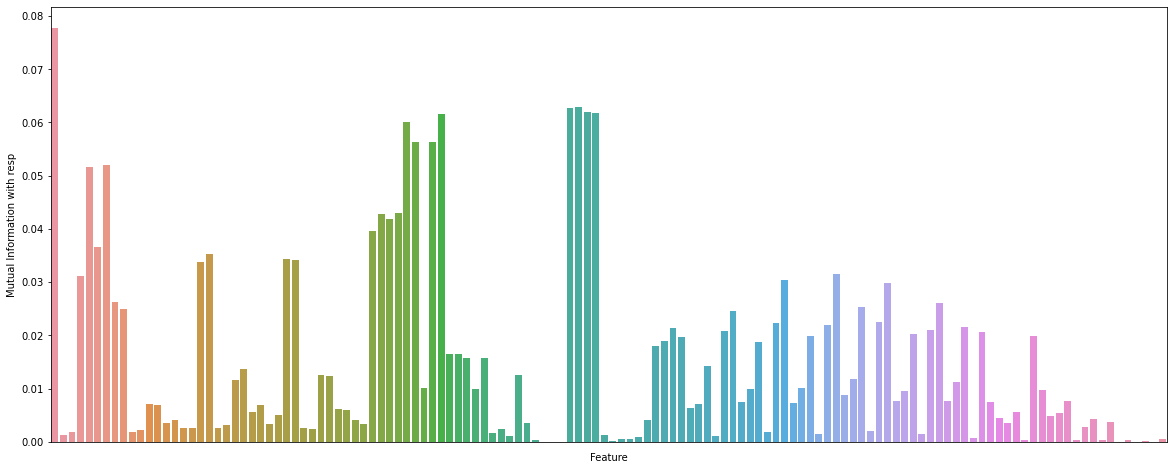

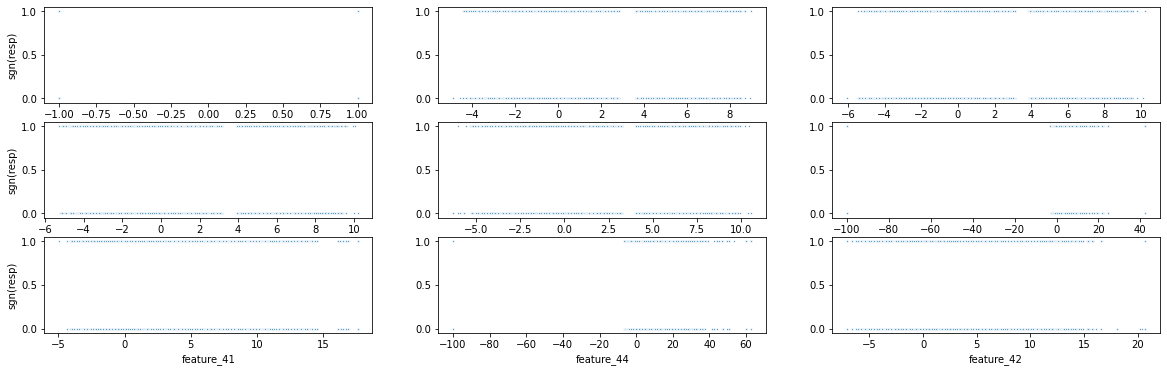

Features sorted by mutual information (descending):
[  0  61  60  62  63  45  41  44  42   6   4  40  38  39  37   5  18  27
  28  17  91   3  85  97   7 103  94   8  79  96  84  90 106  72 102  78
 108 100 114  88  73  71  82  70  47  46  50  48  76  22  54  31  32  93
  21 105  43  87  81  49 115  99  92 118  98 104  80 109  86  75  11  12
  24  74  33  34  23 112 117  26 116 110 121  35  14  69 123  55 111  13
  25  36  20 120  15  29  19  16  52  30  10  95  83   9   2  51  89 101
  64   1  53  77  68 107  67  66 129 122 125 119 113  56 127  65  58  57
 128 124 126  59]


In [4]:
mi = mutual_info_classif(train_X, train_y, discrete_features=False, random_state=13)

plt.figure(figsize=(20, 8))
ax = sns.barplot(x=np.arange(mi.size), y=mi)
ax.set_xlabel("Feature")    
ax.set_ylabel("Mutual Information with resp")
ax.set(xticklabels=[])
ax.tick_params(bottom=False)
plt.show()

print("Features sorted by mutual information (descending):")
print(np.argsort(-mi))